# Day 7: Recursive Circus

## Part One

Wandering further through the circuits of the computer, you come upon a tower of programs that have gotten themselves into a bit of trouble. A recursive algorithm has gotten out of hand, and now they're balanced precariously in a large tower.

One program at the bottom supports the entire tower. It's holding a large disc, and on the disc are balanced several more sub-towers. At the bottom of these sub-towers, standing on the bottom disc, are other programs, each holding their own disc, and so on. At the very tops of these sub-sub-sub-...-towers, many programs stand simply keeping the disc below them balanced but with no disc of their own.

You offer to help, but first you need to understand the structure of these towers. You ask each program to yell out their name, their weight, and (if they're holding a disc) the names of the programs immediately above them balancing on that disc. You write this information down (your puzzle input). Unfortunately, in their panic, they don't do this in an orderly fashion; by the time you're done, you're not sure which program gave which information.

For example, if your list is the following:

- pbga (66)
- xhth (57)
- ebii (61)
- havc (66)
- ktlj (57)
- fwft (72) -> ktlj, cntj, xhth
- qoyq (66)
- padx (45) -> pbga, havc, qoyq
- tknk (41) -> ugml, padx, fwft
- jptl (61)
- ugml (68) -> gyxo, ebii, jptl
- gyxo (61)
- cntj (57)

...then you would be able to recreate the structure of the towers that looks like this:

                gyxo
              /     
         ugml - ebii
       /      \     
      |         jptl
      |        
      |         pbga
     /        /
tknk --- padx - havc
     \        \
      |         qoyq
      |             
      |         ktlj
       \      /     
         fwft - cntj
              \     
                xhth
                
In this example, tknk is at the bottom of the tower (the bottom program), and is holding up ugml, padx, and fwft. Those programs are, in turn, holding up other programs; in this example, none of those programs are holding up any other programs, and are all the tops of their own towers. (The actual tower balancing in front of you is much larger.)

Before you're ready to help them, you need to make sure your information is correct. What is the name of the bottom program?

In [135]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np

In [136]:
G = nx.DiGraph()

In [137]:
with open('day07_inp.dat', 'r') as f:
    for line in f:
        node = line.split(' ')[0]
        weight = int(line.split('(')[1].split(')')[0])
        G.add_node(node, weight=weight)
        if '->' in line:
            children = line.split('->')[1].strip().split(',')
            for child in children:
                G.add_edge(node, child.strip())
                

In [138]:
ordered = list(nx.topological_sort(G))
print(ordered[0])

vgzejbd


In [139]:
import matplotlib.pyplot as plt

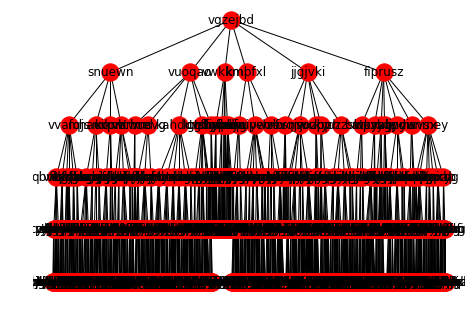

In [140]:
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False)

## Part Two

The programs explain the situation: they can't get down. Rather, they could get down, if they weren't expending all of their energy trying to keep the tower balanced. Apparently, one program has the wrong weight, and until it's fixed, they're stuck here.

For any program holding a disc, each program standing on that disc forms a sub-tower. Each of those sub-towers are supposed to be the same weight, or the disc itself isn't balanced. The weight of a tower is the sum of the weights of the programs in that tower.

In the example above, this means that for ugml's disc to be balanced, gyxo, ebii, and jptl must all have the same weight, and they do: 61.

However, for tknk to be balanced, each of the programs standing on its disc and all programs above it must each match. This means that the following sums must all be the same:

* ugml + (gyxo + ebii + jptl) = 68 + (61 + 61 + 61) = 251
* padx + (pbga + havc + qoyq) = 45 + (66 + 66 + 66) = 243
* fwft + (ktlj + cntj + xhth) = 72 + (57 + 57 + 57) = 243

As you can see, tknk's disc is unbalanced: ugml's stack is heavier than the other two. Even though the nodes above ugml are balanced, ugml itself is too heavy: it needs to be 8 units lighter for its stack to weigh 243 and keep the towers balanced. If this change were made, its weight would be 60.

Given that exactly one program is the wrong weight, what would its weight need to be to balance the entire tower?

In [141]:
import collections

In [142]:
weights = {}
for node in reversed(ordered):
    total = G.nodes[node]['weight']
    
    counts = collections.Counter(weights[child] for child in G[node])
    unbalanced = None
    
    for child in G[node]:
        if len(counts) > 1 and counts[weights[child]] == 1:
            unbalanced = child
            break
        
        val = weights[child]
        total += weights[child]
        
    if unbalanced:
        diff = weights[unbalanced] - val
        print(G.nodes[unbalanced]['weight'] - diff)
        break
        
    weights[node] = total

1226
